# Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3$
 
which has three real roots at $x=-2.5,0.5,1.5$.

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should fill an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (n_search), for n_search values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.

d)	Modify the code created in part a) to allow for the possibility to find the roots of other polynomials or functions.

A)Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

0.0017969608306884766

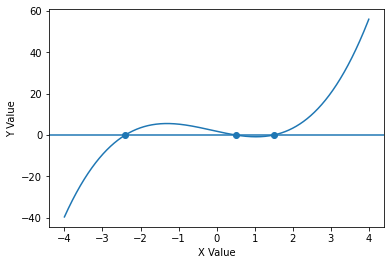


B)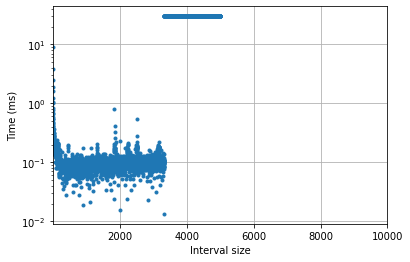

C) for graph B, at around 3500 points, the time jumps up significantly. When increasing the number of points the time becomes more clear and concise. 

D) def generator_function(x,*par):
  y = 0
  for i in range(len(par)):
    z = par[i]*x**i
    y = y + z
  return y


## Question 2 - Fitting data

*a*) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Linear Regression to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

In [ ]:
import seaborn as sns
sns.regplot('Altitude', 'Density', df, ci=99.99)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]*np.exp(paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Altitude'])
y = np.array(df['Density'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(np.min(x),np.max(x),100)
#xi = np.linspace(2.5,5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()